In [1]:
from modules.load import *

# -- Parameters
path_scalogram = 'D:/USC/00_data/scalograms/2000t_16f'
inclusion_option = 'healthy_insomnia'
verbose = True

fname_scalogram = 'scalogram_%s_%s.npy' % (path_scalogram.split('/')[-1], inclusion_option)
fname_df_demo = "df_demo_%s_%s.csv" % (path_scalogram.split('/')[-1], inclusion_option)

# -- Get df_demo
# 1. Init df_demo =================================================
df_demo = init_df_demo(verbose=verbose)

# 2. Select patients with scalograms ==============================
df_demo = find_subjects_with_scalograms(path_scalogram=path_scalogram, df=df_demo, verbose=verbose)

# 3. Add 'bai' column to the df_demo ==============================
df_demo = add_bai_to_df_demo(df=df_demo, verbose=verbose)
df_demo = add_bai_to_df_demo_healthy(df=df_demo, verbose=verbose)

# 4. Select columns (features) ====================================
df_demo = select_columns(df_demo, verbose=verbose)

# 5. Remove abnormal values for (ISI and AHI) =====================
df_demo = remove_abnormal_ahi_isi(df_demo, verbose=verbose)

# 6. Add custom features ==========================================
#   - N2 latency/TST, REM latency/TST
#   - if there is any abnormal value, the patient with that value will be recorded as NaN in the column
df_demo = addFeatures(df_demo, verbose=verbose)

# 7. Assign paradoxical criteria ==================================
df_demo = assign_paradoxical(df_demo, verbose=verbose)
df_demo_pre_exclusion = df_demo.copy()

# 8. Subject Exclusion ============================================
df_demo = subject_inclusion(df_demo, inclusion_option=inclusion_option, verbose=verbose)


INIT 1_Number of subjects in df_demo at first: 5282
INIT 2_Number of subjects with scalograms: 4653
       Number of patients who provide both 'df_demo' and 'scalograms': 4652
INIT 3_Number of patients who provide 'BAI': 645
INIT 3_Number of patients who provide 'BAI': 1062
INIT 4 Select features; number of features=30
INIT 5_Number of patients after removal of abnormals in 'AHI' and 'ISI': 4652
INIT 6_Add custom features to the df_demo
       'N2_latency/TST' was added to the 3613 patients
       'REM_latency/TST' was added to the 4617 patients
INIT 7_Assign paradoxical criteria and values to the df_demo
INIT 8_Subject Inclusion
       Number of included subjects: 1877


     load scalograms: 100%|██████████| 1877/1877 [00:02<00:00, 707.14it/s]


INIT 9_Load Selected Scalograms
       Channel mode: single
       Shape of scalograms: (1877, 16, 2000, 1)
       Scalograms are saved to 'D:/USC/01_code/insomnia_clustering\data\single\scalogram_2000t_16f_healthy_insomnia.npy'


     load scalograms: 100%|██████████| 1877/1877 [00:02<00:00, 641.75it/s]


INIT 9_Load Selected Scalograms
       Channel mode: 6ch
       Shape of scalograms: (1877, 16, 2000, 6)
       Scalograms are saved to 'D:/USC/01_code/insomnia_clustering\data\6ch\scalogram_2000t_16f_healthy_insomnia.npy'


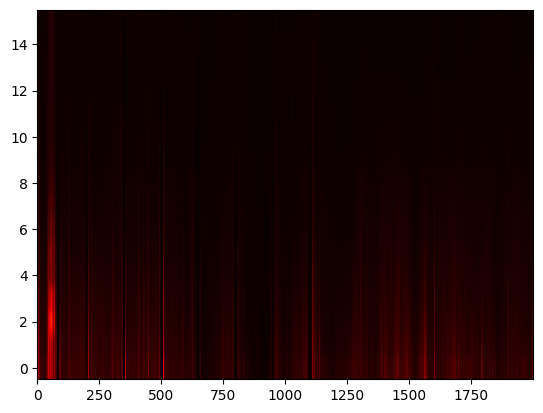

In [5]:
from modules import load
scalogramas = load.load_scalograms(path_scalogram=path_scalogram,
                                   df=df_demo,
                                   verbose=verbose,
                                   channel_mode='single',
                                   save_npy=True)

scalogramas = load.load_scalograms(path_scalogram=path_scalogram,
                                   df=df_demo,
                                   verbose=verbose,
                                   channel_mode='6ch',
                                   save_npy=True)

import matplotlib.pyplot as plt
plt.imshow(scalogramas[1][:, :, 1], aspect='auto', origin='lower', cmap='hot')

In [6]:
from modules.gen_df_MR import gen_additional_scalogram_npy
gen_additional_scalogram_npy(verbose=True, save_npy=True, channel_mode='single')
gen_additional_scalogram_npy(verbose=True, save_npy=True, channel_mode='6ch')

Laod df_init.csv ... Successful !!


 ------ generating .npy scalograms which also provide MR features
     include all types of subject (healthy, insomnia ...)


     load scalograms: 100%|██████████| 14/14 [00:00<00:00, 76.77it/s]


run resampling...
INIT 9_Load Selected Scalograms
       Channel mode: single
       Shape of scalograms: (14, 16, 2000, 1)
 ------ generating done.

Number of subjects who are insomnia, providing both a scalogram and MR features: 14
--> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
--> ['PE091200' 'PE09422' 'PE09485' 'PE09997' 'PE100289' 'PE100403' 'PE100897'
 'PE100998' 'PE101082' 'PE101159' 'PE110179' 'PE110187' 'PE160017'
 'PE170126']
--> not selected []

Saving scalograms with MR features of only insomnia subjects as .npy file ... Successful !!
 --> D:/USC/01_code/insomnia_clustering\data\single\scalograms_with_MR_only_insomnia.npy

 ------ generating .npy scalograms which also provide MR features
     include all types of subject (healthy, insomnia ...)


     load scalograms: 100%|██████████| 14/14 [00:00<00:00, 61.81it/s]


run resampling...
INIT 9_Load Selected Scalograms
       Channel mode: 6ch
       Shape of scalograms: (14, 16, 2000, 6)
 ------ generating done.

Number of subjects who are insomnia, providing both a scalogram and MR features: 14
--> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
--> ['PE091200' 'PE09422' 'PE09485' 'PE09997' 'PE100289' 'PE100403' 'PE100897'
 'PE100998' 'PE101082' 'PE101159' 'PE110179' 'PE110187' 'PE160017'
 'PE170126']
--> not selected []

Saving scalograms with MR features of only insomnia subjects as .npy file ... Successful !!
 --> D:/USC/01_code/insomnia_clustering\data\6ch\scalograms_with_MR_only_insomnia.npy


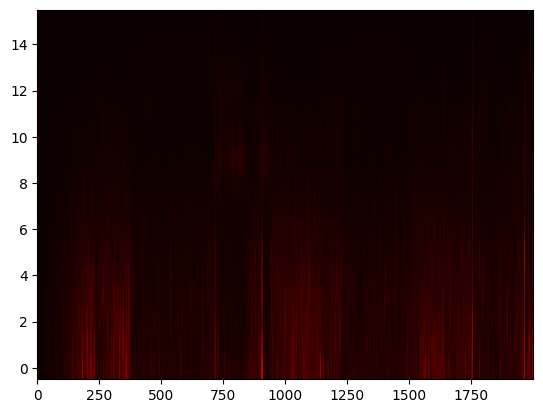

In [ ]:
# original version
import numpy as np
scalogramas = np.load('./data/1ch/scalogram_2000t_16f_healthy_insomnia.npy')
scalogramas.shape

(1877, 16, 2000, 1)

In [16]:
import numpy as np
scalogramas = np.load('./data/1ch/scalogram_scalograms_with_MR_only_insomnia.npy')
print(scalogramas.shape)

import h5py as h5
path_scalogram_MR = 'D:/USC/00_data/scalograms_with_MR/PE091200.h5'
f = h5.File(path_scalogram_MR, 'r')
scal = np.array(f['scalogram'])
print(scal.shape)

path_scalogram_MR = 'D:/USC/00_data/scalograms_with_MR_resamled2000/PE091200.h5'
f = h5.File(path_scalogram_MR, 'r')
scal = np.array(f['scalogram'])
print(scal.shape)

(13, 16, 2000, 1)
(16, 6, 1, 27660)
(16, 2000, 1)
